In [37]:
import xarray as xr
import pandas as pd
import numpy as np

In [38]:
path_clim = '/home/www/oggm/climate/gswp3-w5e5/'

for var in ['pr']:
    fp = path_clim + 'flattened/monthly/gswp3-w5e5_obsclim_{}_global_monthly_1901_2019_flat_glaciers.nc'.format(var)
    ds_flattened = xr.open_dataset(fp)
    fp_unflat = path_clim + 'unflattened/monthly/gswp3-w5e5_obsclim_{}_global_monthly_1901_2019.nc'.format(var)
    ds_unflattened = xr.open_dataset(fp_unflat)
    
lon_p, lat_p = 77.76, 36.75
ds_sel_unflattened = ds_unflattened[var].sel(lon = lon_p, lat=lat_p, method='nearest')
c = (ds_flattened.longitude - lon_p)**2 + (ds_flattened.latitude - lat_p)**2
ds_sel = ds_flattened.isel(points=np.argmin(c.data)).pr
np.testing.assert_allclose(ds_sel, ds_sel_unflattened)

In [22]:
import matplotlib.pyplot as plt

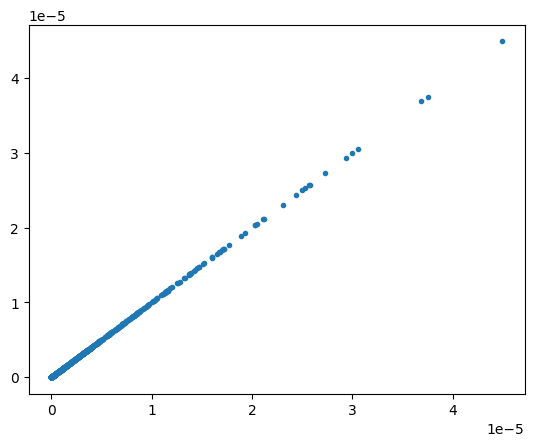

In [35]:
plt.plot(ds_sel_unflattened, ds_sel,'.')

In [ ]:
path_clim = '/home/www/oggm/climate/gswp3-w5e5/'

for var in ['pr', 'tas']:
    fp = path_clim + 'flattened/monthly/gswp3-w5e5_obsclim_{}_global_monthly_1901_2019_flat_glaciers.nc'.format(var)
    ds_flattened = xr.open_dataset(fp)
    fp_unflat = path_clim + 'unflattened/monthly/gswp3-w5e5_obsclim_{}_global_monthly_1901_2019.nc'.format(var)
    ds_unflattened = xr.open_dataset(fp_unflat)
    
    # check for every glacier gridpoint if the correct climate dataset 
    # was used by comparing it to the unflattened file:
    for p in ds_flattened.points:
        # get the point
        ds_flattened_sel = ds_flattened.sel(points=p)
        # select longitude, latitude and tas of that point
        lon_p = ds_flattened_sel.longitude
        lat_p = ds_flattened_sel.latitude
        var_p = ds_flattened_sel[var]
        # select the same gridpoint from the unflattened file
        # the unflattened file is in -180, 180
        if lon_p >=180:
            lon_p = lon_p-360
        # check if the unflattened and the flattened file have the same climate
        # data inside
        np.testing.assert_allclose(var_p.values,
                                   ds_unflattened[var].sel(lon = lon_p, lat=lat_p))


In [3]:


ds = xr.open_dataset('/home/www/oggm/climate/gswp3-w5e5/unflattened/monthly/gswp3-w5e5_obsclim_pr_global_monthly_1901_2019.nc')

ModuleNotFoundError: No module named 'pandas'

In [4]:
import xesmf

ModuleNotFoundError: No module named 'xesmf'

In [2]:
import pandas